In [1]:
# Author: Marcus
# Created: Feb 26, 2018
# Last modified: Mar 3, 2018

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6, 4

# data set from kaggle 'Red Wine Quality'
# https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
wine.info()
# The data set is clean, so let's do our job!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


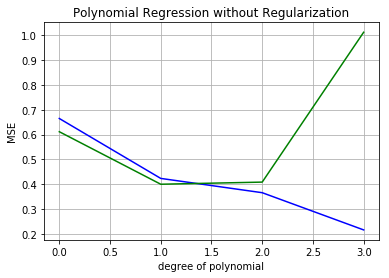

In [5]:
# Overfitting detecting

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


X = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
         'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = wine[['quality']]

# Set random_state as a const to make sure the same split will be generated every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Containers for note down the MSE
train_mse_list = []
test_mse_list = []
degree_of_polynomial = []

# MSE of quartic expression will be very large compared with the lower degree, so let's just end at 3.
for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    # Transfer the X to a polynomial form by using fit_transform
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    lm = linear_model.LinearRegression()
    lm.fit(X_train_, y_train)
    train_pred = lm.predict(X_train_)
    train_mse_list.append(mean_squared_error(y_train, train_pred))
    test_pred = lm.predict(X_test_)
    test_mse_list.append(mean_squared_error(y_test, test_pred))
    degree_of_polynomial.append(i)

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without Regularization')
plt.plot(degree_of_polynomial, train_mse_list, '-b', degree_of_polynomial, test_mse_list, '-g')
plt.show()

# Blue line is the training error
# Green line is the testing error. We can see that overfitting exits.

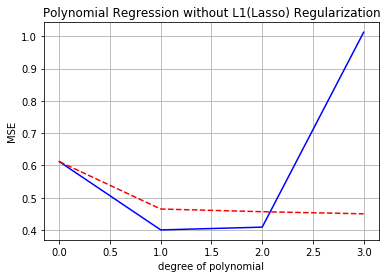

In [6]:
# Use Lasso(L1) regularization to fix overfitting

from sklearn.linear_model import Lasso

# Randomly pick a alpha value for regularization
l1reg = Lasso(alpha=0.005, normalize=True)

l1reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    
    l1reg.fit(X_train_, y_train)
    test_pred_l1 = l1reg.predict(X_test_)
    l1reg_test_mse_list.append(mean_squared_error(y_test, test_pred_l1))

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without L1(Lasso) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, l1reg_test_mse_list, '--r')
plt.show()

# Blue line is the testing error before regularization
# Red dash line is the testing error after L1 regularization. It does fix overfitting ut does not perform as
# good as we expected when degree of polynomial is 2.

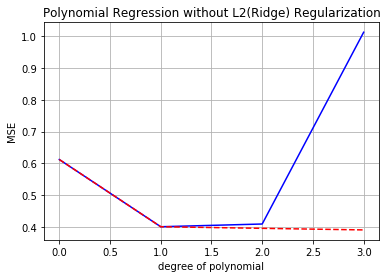

In [6]:
# Use Ridge(L2) regularization to fix overfitting

from sklearn.linear_model import Ridge

l2reg = Ridge(alpha=0.005, normalize=True)

l2reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    
    l2reg.fit(X_train_, y_train)
    test_pred_l2 = l2reg.predict(X_test_)
    l2reg_test_mse_list.append(mean_squared_error(y_test, test_pred_l2))

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without L2(Ridge) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, l2reg_test_mse_list, '--r')
plt.show()

# Red dash line is the testing error after L2 regularization

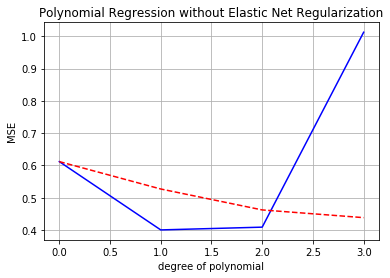

In [7]:
# Use Elastic Net regularization to fix overfitting

from sklearn.linear_model import ElasticNet

enreg = ElasticNet(alpha=0.005, normalize=True)

enreg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    
    enreg.fit(X_train_, y_train)
    test_pred_en = enreg.predict(X_test_)
    enreg_test_mse_list.append(mean_squared_error(y_test, test_pred_en))

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without Elastic Net Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, enreg_test_mse_list, '--r')
plt.show()
# Red dash line is the testing error after Elastic Net regularization

The generalization score of linear regression model is 0.330118
The generalization score of quadratic regression model is 0.275378


The calculated optimal alpha is 0.000300 
The max generalization score of L1 regularized polynomial regression model is 0.358606 +- 0.002279


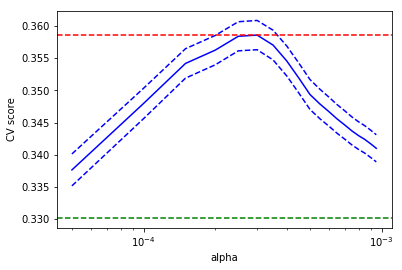

In [9]:
# Find a better alpha for regularization

from sklearn import model_selection

# Use cross_val_score to measure the generalization performance of the model. We want to get the optimal alpha
# which maximums the cross_val_score
# Set the fold to 5 by "cv=5" since we does not want a high computation
lm_score = np.mean(model_selection.cross_val_score(lm, X_train, y_train, n_jobs=1, cv=5))
print 'The generalization score of linear regression model is %f' % np.mean(lm_score)

# Since alpha=0.005 is not that good, we set it as a lower bound to find a better value. You can also set it as a
# higher bound which does not matter.
alphas = np.arange(5e-5, 1e-3, 5e-5)

scores = []
scores_std = []

# Let's just set the degree of polynomial as 2 to simplify the calculation

model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(X_train)

pm_score = np.mean(model_selection.cross_val_score(lm, X_train_, y_train, n_jobs=1, cv=5))
print 'The generalization score of quadratic regression model is %f' % np.mean(pm_score)

# 5-fold CV will train the same alpha 5 times on 5 different train sets and return 5 different models.
# Then it will test these 5 models on corresponding test sets to get the cross validation scores.
# Average the scores as the final score of the given alpha.

for alpha in alphas:
    l1reg.alpha = alpha
    this_scores = model_selection.cross_val_score(l1reg, X_train_, y_train, n_jobs=1, cv=5)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

max_score = np.max(scores)
max_score_pos = scores.index(max_score)
optimal_alpha = alphas[max_score_pos]
std_err = np.array(scores_std) / np.sqrt(len(X_train_))
print 'The calculated optimal alpha is %f ' % optimal_alpha
print 'The max generalization score of L1 regularized polynomial regression model is %f +- %f' \
      % (max_score, std_err[max_score_pos])

plt.semilogx(alphas, np.array(scores), '-b')
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + std_err, '--b')
plt.semilogx(alphas, np.array(scores) - std_err, '--b')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='r')
plt.axhline(lm_score, linestyle='--', color='g')
plt.show()

# Blue solid line is the cv scores with alpha increasing.
# Blue dash line is the standard deviation of cv scores.
# Red dash line is the max value of cv scores.
# Green dash line is a bonus. It is the cv score of linear model. What we expect is that the cv score after
# regularization with optimal alpha will be higher than original quadratic model. The truth is that it is even
# higher than the linear model's. Even we look at the lower blue dash line.

MSE of linear regression model is 0.400073
MSE of quadratic regression model is 0.408636
MSE of optimal L1 regularized quadratic regression model is 0.393777


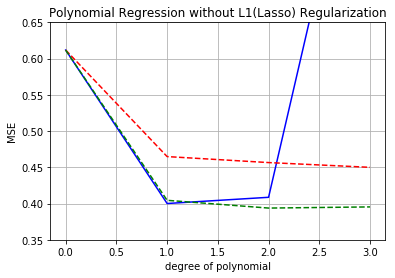

In [10]:
# Set the alpha as the optimal value we got from the last step

optimal_l1reg = Lasso(alpha=0.0003, normalize=True)

opt_l1reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    optimal_l1reg.fit(X_train_, y_train)
    test_opt_pred_l1 = optimal_l1reg.predict(X_test_)
    opt_l1reg_test_mse_list.append(mean_squared_error(y_test, test_opt_pred_l1))

print 'MSE of linear regression model is %f' % test_mse_list[1]
print 'MSE of quadratic regression model is %f' % test_mse_list[2]
print 'MSE of optimal L1 regularized quadratic regression model is %f' % opt_l1reg_test_mse_list[2]


plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.ylim((0.35, 0.65))
plt.grid(True)
plt.title('Polynomial Regression without L1(Lasso) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, l1reg_test_mse_list, '--r',
         degree_of_polynomial, opt_l1reg_test_mse_list, '--g')
plt.show()

# Green dash line is the testing error after L1 regularization with optimal alpha. We can see that it is lower
# than the red dash line which using alpha=0.005.

In [11]:
# L1 encourages sparsity

model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(X_train)
X_test_ = model.fit_transform(X_test)
optimal_l1reg.fit(X_train_, y_train)
lm.fit(X_train_, y_train)

quadratic_features = model.get_feature_names(wine.columns)
total_coef = len(model.get_feature_names(wine.columns))
nz_lm_coef = 0
l1_coef_dict = {}
for i in range(total_coef):
    # if the coefficient is not zero, add 1 to the count.
    if lm.coef_.T[i] != 0.0:
        nz_lm_coef += 1
    if optimal_l1reg.coef_[i] != 0.0:
        l1_coef_dict[quadratic_features[i]] = optimal_l1reg.coef_[i].round(10)

# Let's see how many features could be used in a quadratic model.
print quadratic_features

# And let's see how many non-zero coefficients of features (which means the features the model actually uses) 
# in a quadratic model without L1 regularization.
print 'Before Lasso regularization, there are %i nonzero coefficients in quadratic regression model.' % nz_lm_coef

print 'After Lasso regularization, there are only %i nonzero coefficients in quadratic regression model.' % len(l1_coef_dict)
# After L1, the number of features reduce from 77 to 17!
# Here is the features and their coefficients in our final L1 regularized quadratic model.
# You can generate the y-X function using these dict.
l1_coef_dict

['1', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'fixed acidity^2', 'fixed acidity volatile acidity', 'fixed acidity citric acid', 'fixed acidity residual sugar', 'fixed acidity chlorides', 'fixed acidity free sulfur dioxide', 'fixed acidity total sulfur dioxide', 'fixed acidity density', 'fixed acidity pH', 'fixed acidity sulphates', 'fixed acidity alcohol', 'volatile acidity^2', 'volatile acidity citric acid', 'volatile acidity residual sugar', 'volatile acidity chlorides', 'volatile acidity free sulfur dioxide', 'volatile acidity total sulfur dioxide', 'volatile acidity density', 'volatile acidity pH', 'volatile acidity sulphates', 'volatile acidity alcohol', 'citric acid^2', 'citric acid residual sugar', 'citric acid chlorides', 'citric acid free sulfur dioxide', 'citric acid total sulfur dioxide', 'citric acid density', 'citric acid pH', 'citric acid sulp

{'alcohol': 0.1564436443,
 'chlorides free sulfur dioxide': -0.0389574381,
 'chlorides sulphates': -0.6380616123,
 'chlorides total sulfur dioxide': -0.0006101864,
 'chlorides^2': -0.8473620768,
 'citric acid chlorides': -0.073554741,
 'density': -0.6456629445,
 'density^2': -5.3972965601,
 'free sulfur dioxide alcohol': 0.0004256427,
 'pH^2': -0.0434723941,
 'residual sugar free sulfur dioxide': 0.0004002069,
 'residual sugar total sulfur dioxide': 0.0001648962,
 'sulphates alcohol': 0.1502496649,
 'total sulfur dioxide sulphates': -0.0086725332,
 'volatile acidity pH': -0.2154490568,
 'volatile acidity total sulfur dioxide': 0.0036220673,
 'volatile acidity^2': -0.4032866769}